In [15]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Read the csv file, which is the scraped Tripadvisor restaurant data
data = pd.read_csv(r'File-Name.csv', sep=',')

#Deleting duplicates in links (so no duplicates in restaurants)
data.drop_duplicates(subset=['links'],inplace=True)

#Create new variable "post2" which is the postal code and makes it numeric
data['post1']=data['rest_location'].astype(str).str[:-8].copy()
data['post2']=data['post1'].astype(str).str[-4:].copy()
data['post2']=pd.to_numeric(data['post2'], errors='ignore')

#Drop elements in post2, that doenst look like a postal code
data3=data.loc[(data['post2'] != 'havn') & (data['post2'] != '00 N') & (data['post2'] != '06 K') & (data['post2'] != 'vn V') & (data['post2'] != '')].copy()
data3.dropna(subset=['rest_cuisine'], inplace=True)

In [17]:
#we make a new dataframe
new = pd.DataFrame([data3.rest_name, data3.rest_rating, data3.post2, data3.links , data3.rest_cuisine]).transpose()

#make a DF with the duplicates
duplicateDFRow = new[new.duplicated()]
print(duplicateDFRow)

#removes duplicates and make a new dataframe
new2 = new.drop_duplicates()
#sort the new dataframe
new3 = new2.copy()
new3 = new3.sort_values('post2')
new3 = new3.reset_index(drop = True)
#new3.set_index('post2')

#we change 3 postal codes from 1001 to 1050 since 1001 is a postal box - (kilde:https://www.dst.dk/da/TilSalg/Forskningsservice/Dokumentation/hoejkvalitetsvariable/folketal/postnr)
new3.iloc[:3 , 2] = str(1050)

#make a new column with districts (KBH K and so on)
new3['area'] = new3['post2']

#change the type
new3['post2'] = new3['post2'].astype(float)

#add data to the new columns
new3['area'] = pd.cut(new3.post2, bins=[0, 1499, 1799, 1999, 2000, 2100, 2150, 2200, 2300, 2400, 2450, 2500, 2610, 2620, 2630, 2700, 2720, 2770, 2791, 2800, 2820, 2840, 2860, 2870, 2900], labels=['København K', 'København V','Frederiksberg C', 'Frederiksberg', 'København Ø', 'Nordhavn', 'København N', 'København S', 'København NV', 'København SV', 'Valby', 'Rødovre', 'Albertslund', 'Høje Taastrup', 'Brønshøj', 'Vanløse', 'Kastrup', 'Dragør', 'Kongens Lyndby', 'Gentofte', 'Holte', 'Søborg', 'Dyssegård','Hellerup'])

#replace '' and remove them - because their postal code is outside of 2900 (e.g. 2930, 3500, 5000)
new3['area'].replace('', np.nan, inplace=True)
new3.dropna(subset=['area'], inplace=True)

Empty DataFrame
Columns: [rest_name, rest_rating, post2, links, rest_cuisine]
Index: []


In [18]:
###### FROM HERE I BEGIN CALCULATING THE AVERAGE RATING PER AREA
#CALCULATING OF THE SUM OF RESTAURANT AND THEIR RATINGS PER AREA
#We calculate the sum and the amount of restaurant per district

try:
    sum_kbhK = new3[new3['area'] == 'København K'].rest_rating.sum()
    len_kbhK = len(new3[new3['area'] == 'København K'].rest_rating)
    avg_rating_kbhK = sum_kbhK/len_kbhK
except:
    avg_rating_kbhK = np.nan

try:
    sum_kbhV = new3[new3['area'] == 'København V'].rest_rating.sum()
    len_kbhV = len(new3[new3['area'] == 'København V'].rest_rating)
    avg_rating_kbhV = sum_kbhV/len_kbhV
except:
    avg_rating_kbhV = np.nan

try:
    sum_F= new3[new3['area'] == 'Frederiksberg'].rest_rating.sum()
    len_F = len(new3[new3['area'] == 'Frederiksberg'].rest_rating)
    avg_rating_F = sum_F/len_F
except:
    avg_rating_F = np.nan

try:
    sum_Fc= new3[new3['area'] == 'Frederiksberg C'].rest_rating.sum()
    len_Fc = len(new3[new3['area'] == 'Frederiksberg C'].rest_rating)
    avg_rating_Fc = sum_Fc/len_Fc
except:
    avg_rating_F = np.nan

try:
    sum_kbhOE = new3[new3['area'] == 'København Ø'].rest_rating.sum()
    len_kbhOE = len(new3[new3['area'] == 'København Ø'].rest_rating)
    avg_rating_kbhOE = sum_kbhOE/len_kbhOE
except:
    avg_rating_kbhOE = np.nan

try:
    sum_N = new3[new3['area'] == 'Nordhavn'].rest_rating.sum()
    len_N = len(new3[new3['area'] == 'Nordhavn'].rest_rating)
    avg_rating_N = sum_N/len_N
except:
    avg_rating_N = np.nan

try:
    sum_kbhN = new3[new3['area'] == 'København N'].rest_rating.sum()
    len_kbhN = len(new3[new3['area'] == 'København N'].rest_rating)
    avg_rating_kbhN = sum_kbhN/len_kbhN
except:
    avg_rating_kbhN = np.nan

try:
    sum_kbhS = new3[new3['area'] == 'København S'].rest_rating.sum()
    len_kbhS = len(new3[new3['area'] == 'København S'].rest_rating)
    avg_rating_kbhS = sum_kbhS/len_kbhS
except:
    avg_rating_kbhS = np.nan

try:
    sum_kbhNV = new3[new3['area'] == 'København NV'].rest_rating.sum()
    len_kbhNV = len(new3[new3['area'] == 'København NV'].rest_rating)
    avg_rating_kbhNV = sum_kbhNV/len_kbhNV
except:
    avg_rating_kbhNV = np.nan

try:
    sum_kbhSV = new3[new3['area'] == 'København SV'].rest_rating.sum()
    len_kbhSV = len(new3[new3['area'] == 'København SV'].rest_rating)
    avg_rating_kbhSV = sum_kbhSV/len_kbhSV
except:
    avg_rating_kbhSV = np.nan

try:
    sum_V = new3[new3['area'] == 'Valby'].rest_rating.sum()
    len_V = len(new3[new3['area'] == 'Valby'].rest_rating)
    avg_rating_V = sum_V/len_V
except:
    avg_rating_V = np.nan

try:
    sum_R = new3[new3['area'] == 'Rødovre'].rest_rating.sum()
    len_R = len(new3[new3['area'] == 'Rødovre'].rest_rating)
    avg_rating_R = sum_R/len_R
except:
    avg_rating_R = np.nan


try:
    sum_AL = new3[new3['area'] == 'Albertslund'].rest_rating.sum()
    len_AL = len(new3[new3['area'] == 'Albertslund'].rest_rating)
    avg_rating_AL = sum_AL/len_AL
except:
    avg_rating_AL = np.nan

try:
    sum_HT = new3[new3['area'] == 'Høje Taastrup'].rest_rating.sum()
    len_HT = len(new3[new3['area'] == 'Høje Taastrup'].rest_rating)
    avg_rating_HT = sum_HT/len_HT
except:
    avg_rating_HT = np.nan

try:
    sum_B = new3[new3['area'] == 'Brønshøj'].rest_rating.sum()
    len_B = len(new3[new3['area'] == 'Brønshøj'].rest_rating)
    avg_rating_B = sum_B/len_B
except:
    avg_rating_B = np.nan

try:
    sum_VL = new3[new3['area'] == 'Vanløse'].rest_rating.sum()
    len_VL = len(new3[new3['area'] == 'Vanløse'].rest_rating)
    avg_rating_VL = sum_VL/len_VL
except:
    avg_rating_VL = np.nan

try:
    sum_K = new3[new3['area'] == 'Kastrup'].rest_rating.sum()
    len_K = len(new3[new3['area'] == 'Kastrup'].rest_rating)
    avg_rating_K = sum_K/len_K
except:
    avg_rating_K = np.nan

try:
    sum_D = new3[new3['area'] == 'Dragør'].rest_rating.sum()
    len_D = len(new3[new3['area'] == 'Dragør'].rest_rating)
    avg_rating_D = sum_D/len_D
except:
    avg_rating_D = np.nan

try:
    sum_KL = new3[new3['area'] == 'Kongens Lyngby'].rest_rating.sum()
    len_KL = len(new3[new3['area'] == 'Kongens Lyngby'].rest_rating)
    avg_rating_KL = sum_KL/len_KL
except:
    avg_rating_KL = np.nan   

try:
    sum_G = new3[new3['area'] == 'Gentofte'].rest_rating.sum()
    len_G = len(new3[new3['area'] == 'Gentofte'].rest_rating)
    avg_rating_G = sum_G/len_G
except:
    avg_rating_G = np.nan   

try:
    sum_H = new3[new3['area'] == 'Holte'].rest_rating.sum()
    len_H = len(new3[new3['area'] == 'Holte'].rest_rating)
    avg_rating_H = sum_H/len_H
except:
    avg_rating_H = np.nan

try:
    sum_S = new3[new3['area'] == 'Søborg'].rest_rating.sum()
    len_S = len(new3[new3['area'] == 'Søborg'].rest_rating)
    avg_rating_S = sum_S/len_S
except:
    avg_rating_S = np.nan

try:
    sum_D = new3[new3['area'] == 'Dyssegård'].rest_rating.sum()
    len_D = len(new3[new3['area'] == 'Dyssegård'].rest_rating)
    avg_rating_D = sum_D/len_D
except:
    avg_rating_D = np.nan

try:
    sum_H = new3[new3['area'] == 'Hellerup'].rest_rating.sum()
    len_H = len(new3[new3['area'] == 'Hellerup'].rest_rating)
    avg_rating_H = sum_H/len_H
except:
    avg_rating_H = np.nan



In [19]:
avg_rate = [avg_rating_kbhK] + [avg_rating_kbhV] + [avg_rating_F] + [avg_rating_Fc] + [avg_rating_kbhOE] + [avg_rating_N] + [avg_rating_kbhN] + [avg_rating_kbhS] + [avg_rating_kbhNV] + [avg_rating_kbhSV] + [avg_rating_V] + [avg_rating_R] + [avg_rating_AL] + [avg_rating_HT] + [avg_rating_B] + [avg_rating_VL] + [avg_rating_K] + [avg_rating_D] + [avg_rating_KL] + [avg_rating_G] +[avg_rating_H] + [avg_rating_S] + [avg_rating_D] +[avg_rating_H]

In [20]:
avg_rate = [x for x in avg_rate if str(x) != 'nan']

print(avg_rate)

[4.191648822269808, 4.096456692913386, 4.131147540983607, 4.130434782608695, 4.171875, 4.333333333333333, 4.224409448818897, 4.128205128205129, 4.25, 4.285714285714286, 4.357142857142857, 5.0, 5.0, 4.166666666666667, 4.0, 4.0, 3.5, 4.166666666666667, 4.0, 4.0, 4.166666666666667]


In [21]:

#I have deleted 'Rødovre' 'Albertslund', 'Kongens Lyngby from the following two lists since it is = NAN (no restaurants)
bydele = ['København K', 'København V','Frederiksberg C', 'Frederiksberg', 'København Ø', 'Nordhavn', 'København N', 'København S', 'København NV', 'København SV', 'Valby', 'Høje Taastrup', 'Brønshøj', 'Vanløse', 'Kastrup', 'Dragør', 'Gentofte', 'Holte', 'Søborg', 'Dyssegård','Hellerup']

antal_rest = [len_kbhK] + [len_kbhV] + [len_F] + [len_Fc] + [len_kbhOE] + [len_N] + [len_kbhN] + [len_kbhS] + [len_kbhNV] + [len_kbhSV] + [len_V] + [len_HT] + [len_B] + [len_VL] + [len_K] + [len_D] + [len_G] +[len_H] + [len_S] + [len_D] +[len_H]

print(bydele, antal_rest)

a_rating = pd.DataFrame(avg_rate)

a_rating = pd.DataFrame(list(zip(bydele, avg_rate, antal_rest)), 
               columns =['Bydele', 'avg_rate', 'antal_rest'])

a_rating2 = a_rating.copy()
a_rating2.set_index('avg_rate')
a_rating2 = a_rating2.sort_values('antal_rest', ascending = False)
a_rating2 = a_rating2.reset_index(drop = True)

['København K', 'København V', 'Frederiksberg C', 'Frederiksberg', 'København Ø', 'Nordhavn', 'København N', 'København S', 'København NV', 'København SV', 'Valby', 'Høje Taastrup', 'Brønshøj', 'Vanløse', 'Kastrup', 'Dragør', 'Gentofte', 'Holte', 'Søborg', 'Dyssegård', 'Hellerup'] [467, 254, 61, 46, 64, 6, 127, 78, 10, 7, 7, 1, 1, 9, 3, 2, 1, 3, 1, 2, 3]


In [22]:
#avg_rate2 = np.around(avg_rate, decimals=3)

In [23]:
#DO NOT USE
#print(avg_rate2)
#import matplotlib.pyplot as plt
#plt.bar(bydele, avg_rate)
#plt.xticks(rotation=70)
#ax = a_rating.plot.bar(x='Bydele', y='avg_rate', rot=90)
#a_rating = a_rating.sort_values('avg_rate')
#fig = plt.figure(figsize=(10 , 8)) # Create matplotlib figure
# ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
#width = 0.4
#a_rating2.avg_rate.plot(kind='bar', color='cadetblue', ax=ax, width=0.5, position=1)
#a_rating2.antal_rest.plot(kind='bar', color='lightcoral', ax=ax2, width=0.5, position=0)
#ax.set_xticklabels(a_rating2['Bydele'], fontsize = 15)
#ax.set_ylabel('Average rating', fontsize=15)
#ax2.set_ylabel('Number of restaurants', fontsize=15)
#ax.set_xlabel('Area', fontsize=15)
#ax.set_title('The average rating and number of restaurants for each area in Copenhagen', fontsize=25)
#ax.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
#plt.xticks(np.arange(min(avg_rate), max(avg_rate)+1, 1.0))
#ax.set_yticks(np.arange(0, 5.5, step=0.5))
#ax2.set_yticks(np.arange(0, 600, step=50))
#ax.set_yticklabels(np.arange(0, 8, step=0.5), rotation=0, fontsize=12)
#ax2.set_yticklabels(np.arange(0, 600, step=50), rotation=0, fontsize=12)
#ax.margins(x=0)
#for p in ax2.patches:
   # ax2.text(p.get_x() + p.get_width()/2., p.get_height()/1.15, '%d' % int(p.get_height()), 
      #      fontsize=10, ha='center', va='bottom' , color = 'black')
#plt.xlim([0,15])
#plt.show()
#fig.savefig('avgrate.PNG')
#fig.savefig("image2.png",bbox_inches='tight',dpi=100)

No handles with labels found to put in legend.


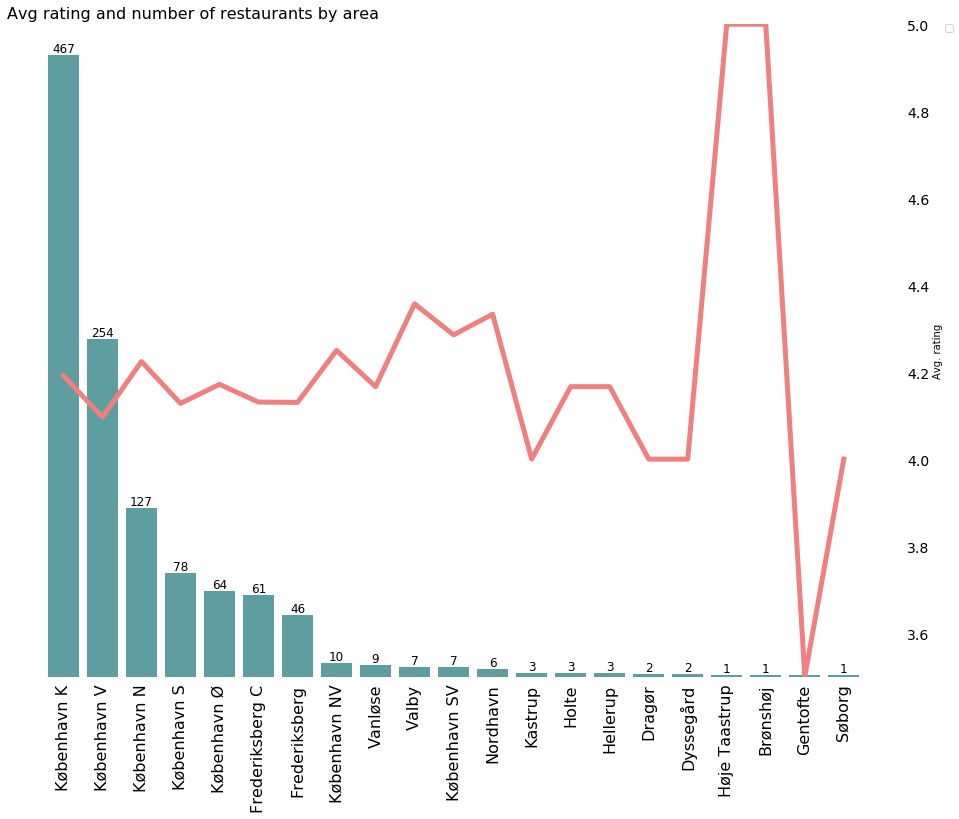

In [24]:
#HERE WE MAKE A GRAPH

import seaborn as sns

fig , ax = plt.subplots(1 , figsize = (16, 12))


#Bar chart
ax = sns.barplot(x = 'Bydele' , y = 'antal_rest' , data = a_rating2 , color = 'cadetblue' , saturation = 1 , ax = ax , ci = None)
ax.set_title('Avg rating and number of restaurants by area' , loc = 'left' , fontsize = 16)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Location of legend
ax.set_xticklabels(a_rating2['Bydele'], fontsize = 16)

ax.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False , right = False , rotation = 90) #Removes ticks

ax.yaxis.set_label_text("#Restaurants") #Removes axis name
ax.xaxis.set_label_text("") #Removes axis name
#ax.set_ylim(0, 6)

ax.get_yaxis().set_visible(False)


#Data labels
for p in ax.patches:
    ax.text((p.get_x()) + p.get_width()/2., p.get_height(), int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

#Adding secondary axis
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'Bydele' , y = 'avg_rate' , data = a_rating2, color = 'lightcoral' , linewidth = 5, ax = ax2 , ci = None , sort = False)
ax2.set_xticklabels(a_rating2['Bydele'] , fontsize = 16)

ax2.set_ylim(3.5, 5)
ax2.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks
ax2.yaxis.set_label_text("Avg. rating") #Removes axis name

#ax2.get_yaxis().set_visible(False)

sns.despine(left = True , bottom = True , right = True) #Removes border

plt.savefig('avg_rate_number.png')

In [25]:
#Cuisines - starts from data3 and creates the same data cleaning(as above) but with all columns
cuisine1 = data3.copy()
cuisine1 = cuisine1.sort_values('post2')
cuisine1 = cuisine1.reset_index(drop = True)

#Changes 3 postal codes to 1050
cuisine1.iloc[:3 , 11] = str(1050)
#Creates new variable "area", a copy of post2 and makes post2 to a float
cuisine1['area'] = cuisine1['post2']
cuisine1['post2'] = cuisine1['post2'].astype(float)
#Changes area to area names with pd.cut
cuisine1['area'] = pd.cut(cuisine1.post2, bins=[0, 1499, 1799, 1999, 2000, 2100, 2150, 2200, 2300, 2400, 2450, 2500, 2610, 2700, 2720, 2770, 2860, 2900], labels=['København K', 'København V','Frederiksberg C', 'Frederiksberg', 'København Ø', 'Nordhavn', 'København N', 'København S', 'København NV', 'København SV', 'Valby', 'Rødovre', 'Brønshøj', 'Vanløse', 'Kastrup', 'Søborg', 'Hellerup'])
#Drops area if nan
cuisine1['area'].replace('', np.nan, inplace=True)
cuisine1.dropna(subset=['area'], inplace=True)
#Drops if rest_cuisine nan
cuisine1.dropna(subset=['rest_cuisine'], inplace=True)

In [26]:
#Since some cuisines have "]" in their rest_cuisine name, we create all rest_cuisine with and without ]
j=['Europæisk', 'Italiensk', 'Japansk', 'Vegetarvenlig',
       'Fisk og skaldyr', 'Pub', 'Bar', 'Fransk', 'Dansk',
       'International', 'Asiatisk', 'Steakhouse', 'Mexicansk',
       'Pizza', 'Café', 'Kinesisk', 'Indisk', 'Amerikansk',
       'Skandinavisk', 'Bar', 'Grillmad', 'Dansk', 'Peruviansk', 'Irsk',
       'Italiensk', 'Sushi', 'Pizza', 'Delikatesseforretning', 'Pub',
       'En hurtig bid mad', 'Vegetarvenlig', 'Middelhavsområdet',
       'Fastfood', 'Steakhouse', 'Fransk', 'Indisk', 'Libanesisk',
       'Ølpub', 'Marokkansk', 'Tyrkisk', 'Fastfood', 'Skandinavisk',
       'Café', 'Mellemøstlig', 'Europæisk', 'Latinamerikansk',
       'Moderne', 'Dessert', 'Asiatisk', 'Belgisk', 'Græsk', 'Moderne',
       'Vinstue', 'Indonesisk', 'Gastropub', 'International', 'Tysk',
       'Mexicansk', 'Hollandsk', 'Mellemøstlig', 'Østrigsk',
       'Kinesisk', 'Fisk og skaldyr', 'Latinamerikansk', 'Thai',
       'Sushi]', 'Nepalesisk', 'Japansk', 'Thai', 'Amerikansk',
       'Schweizisk', 'Middelhavsområdet', 'Vietnamesisk', 'Caribisk',
       'Afrikansk', 'Spisested', 'Etiopisk', 'Brasiliansk','Fusion','Egyptisk','Glutenfri retter','Grill','Hawaiiansk','Koreansk','Malaysisk','Spansk','Sund','Veganske retter','Japansk slikcafé']
k=[i+']' for i in j]
#We create a new variable rest1
cuisine1['rest1']=cuisine1['rest_cuisine']
#We replace the k with j i.e. rest_cuisine with ] is replaced by just rest_cuisine
cuisine1['rest1'].replace(k, j, inplace=True)

In [27]:
#We have narrowed the cuisines down to 20 - again we make to lists
l=['Bar','Fastfood','Bar','Japansk','Bar','Bar','Afrikansk','Europæisk','Europæisk','Café','Fastfood','Asiatisk','Europæisk','Asiatisk','Europæisk','Europæisk','Amerikansk','Europæisk','Latinamerikansk','Asiatisk','Asiatisk','Latinamerikansk','Latinamerikansk','Afrikansk','Café','Middelhavsområdet','Middelhavsområdet','Latinamerikansk','Café','Skandinavisk','Mellemøstlig','Moderne']
m=['Pub','En hurtig bid mad','Ølpub','Sushi','Vinstue','Gastropub','Etiopisk','Østrigsk','Tysk','Spisested','Pizza','Thai','Belgisk','Vietnamesisk','Schweizisk','Hollandsk','Grillmad','Irsk','Peruviansk','Nepalesisk','Indonesisk','Caribisk','Brasiliansk','Marokkansk','Dessert','Tyrkisk','Græsk','Mexicansk','Delikatesseforretning','Dansk','Libanesisk','Vegetarvenlig']
#We create a new variable rest2
cuisine1['rest2']=cuisine1['rest1']
#We replace m with l i.e. m is grouped down to l (20 cuisines)
cuisine1['rest2'].replace(m, l, inplace=True)
cuisine1.rename(columns = {'rest_rating':'rest_rating_aggr'}, inplace=True)
cuisine1

,Unnamed: 0,links,rest_name,rest_location,rest_rating_aggr,rest_cuisine,rest_cuisine_2,rest_cuisine_3,rest_no_review,rest_price_cat,post1,post2,area,rest1,rest2
0,931,https://www.tripadvisor.dk/Restaurant_Review-g...,Lomos Food Shop,"Holbergsgade 17, København 1000 Danmark",4.5,Europæisk,Dansk],NaN,48.0,2.5,"Holbergsgade 17, København 1000",1050.0,København K,Europæisk,Europæisk
1,607,https://www.tripadvisor.dk/Restaurant_Review-g...,Rossopomodoro Illum,"Ostergade 52 Illum, København 1001 Danmark",3.5,Italiensk,Pizza,Middelhavsområdet,315.0,2.5,"Ostergade 52 Illum, København 1001",1050.0,København K,Italiensk,Italiensk
2,363,https://www.tripadvisor.dk/Restaurant_Review-g...,Skagen Fiskerestaurant Illum Rooftop,"Oestergade 52 4. Sal, København 1001 Danmark",4.0,Fisk og skaldyr,Europæisk,Skandinavisk,219.0,2.5,"Oestergade 52 4. Sal, København 1001",1050.0,København K,Fisk og skaldyr,Fisk og skaldyr
3,1276,https://www.tripadvisor.dk/Restaurant_Review-g...,The Bagel Co,"Ostergade 52, København 1001 Danmark",4.0,Vegetarvenlig],NaN,NaN,27.0,1.0,"Ostergade 52, København 1001",1001.0,København K,Vegetarvenlig,Moderne
4,1645,https://www.tripadvisor.dk/Restaurant_Review-g...,Rio Temakeria,"Østergade 52 Illum rooftop, København 1001 Dan...",4.5,Japansk,Brasiliansk,Fisk og skaldyr,13.0,2.5,"Østergade 52 Illum rooftop, København 1001",1001.0,København K,Japansk,Japansk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,678,https://www.tripadvisor.dk/Restaurant_Review-g...,Madhus24,"Søborg Hovedgade 24, København 2870 Danmark",4.0,Café,Europæisk,Skandinavisk,60.0,2.5,"Søborg Hovedgade 24, København 2870",2870.0,Hellerup,Café,Café
1149,754,https://www.tripadvisor.dk/Restaurant_Review-g...,Trattoria Campo De Fiori,"Soeborg Hovedgade 12, København 2870 Danmark",4.0,Italiensk,Europæisk],NaN,51.0,2.5,"Soeborg Hovedgade 12, København 2870",2870.0,Hellerup,Italiensk,Italiensk
1150,278,https://www.tripadvisor.dk/Restaurant_Review-g...,Altopalato,"Duntzfelts Alle 3 Hellerup, København 2900 Dan...",4.5,Italiensk,Europæisk,Vegetarvenlig,139.0,2.5,"Duntzfelts Alle 3 Hellerup, København 2900",2900.0,Hellerup,Italiensk,Italiensk
1151,938,https://www.tripadvisor.dk/Restaurant_Review-g...,Kardemomme,"Maglemosevej 1, København 2900 Danmark",4.0,Indisk,Vegetarvenlig,Veganske retter,56.0,2.5,"Maglemosevej 1, København 2900",2900.0,Hellerup,Indisk,Indisk


In [28]:
#Export cuisines
cuisine1.to_csv(r'kokkenerfinal2.csv', encoding='utf-8-sig')